Generate random gaussian fields

In [1]:
# external
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
# modules from curvedsky/wrap/
import curvedsky as cs

Set parameters

In [2]:
nside = 512  # Nside of Healpix map
npix  = 12*nside**2  # Numer of pixels of Healpix map
lmax  = 2*nside # Maximum multipole of harmonic coefficients to be computed

Input angular power spectrum

In [3]:
Tcmb = 2.72e6
nl = np.ones(lmax+1)*(10./Tcmb*np.pi/10800.)**2 # this is the white noise spectrum with 10 uK'

Generate random gaussian fields

In [4]:
simn = 2  # nunmber of iterations
nmap = np.zeros((simn,npix)) # map for each random field
for i in range(simn):
    # generate random Gaussian fields from the angular power spectrum, nl
    nalm = cs.utils.gauss1alm(lmax,nl) # NOTE: alm is Healpix order, not healpy order
    # convert to Healpix map
    nmap[i,:] = cs.utils.hp_alm2map(nside,lmax,lmax,nalm)

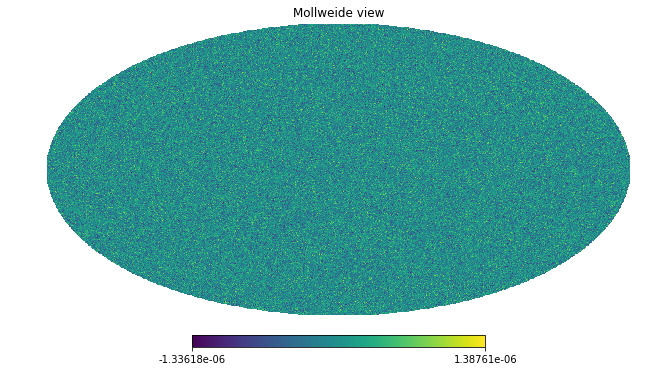

In [5]:
hp.mollview(nmap[0,:])

Compute angular power spectrum

In [6]:
cl = np.zeros((simn,lmax))
for i in range(simn):
    nalm = cs.utils.hp_map2alm(nside,lmax,lmax,nmap[i,:])
    cl = cs.utils.alm2cl(lmax,nalm)
print(np.mean(cl/nl))

0.9954143531182779
